<a href="https://colab.research.google.com/github/Nkhowani/-google-colab-/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%BE%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**📦Анализ доставок Самоката**

#Цели проекта
# 1. Определить закономерности спроса на доставку Samokat в Барнауле (Железнодорожный район).
# 2. Найти пиковые часы и дни недели с наибольшим количеством заказов.
# 3. Изучить факторы, влияющие на время доставки (задержки, погода, спрос).
# 4. Проанализировать распределение стоимости заказов и количество товаров.
# 5. Рассмотреть, какие типы курьеров используются чаще всего.
# 6. Сделать выводы для оптимизации логистики и планирования ресурсов.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Загрузка датасета**

**⚠️ВАЖНО‼:** *Этот датасет является синтетическим (сгенерированным) и НИКАК не отражает реальные данные компании Самокат*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv("/content/samokat_barnaul_zheleznodorozhny_2024_2025.csv", parse_dates=["order_time"])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. **Просмотр данных**

In [ ]:
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample:")
print(df.head())

Shape of dataset: (66592, 23)

Columns: ['order_id', 'city', 'district', 'warehouse_id', 'warehouse_lat', 'warehouse_lon', 'dropoff_lat', 'dropoff_lon', 'order_time', 'hour_of_day', 'day_of_week', 'temperature_c', 'precip_mm', 'weather', 'distance_km', 'courier_type', 'items_count', 'order_value_rub', 'payment_method', 'promo_used', 'promised_minutes', 'actual_minutes', 'delay_minutes']

Sample:
         order_id     city               district warehouse_id  warehouse_lat  \
0  BRN-ZH-0010647  Барнаул  Железнодорожный район      BRN-ZH2         53.345   
1  BRN-ZH-0025914  Барнаул  Железнодорожный район      BRN-ZH2         53.345   
2  BRN-ZH-0061214  Барнаул  Железнодорожный район      BRN-ZH3         53.333   
3  BRN-ZH-0038619  Барнаул  Железнодорожный район      BRN-ZH2         53.345   
4  BRN-ZH-0047507  Барнаул  Железнодорожный район      BRN-ZH3         53.333   

   warehouse_lon  dropoff_lat  dropoff_lon          order_time  hour_of_day  \
0         83.742    53.323785    83

2. **Заказы по дням**

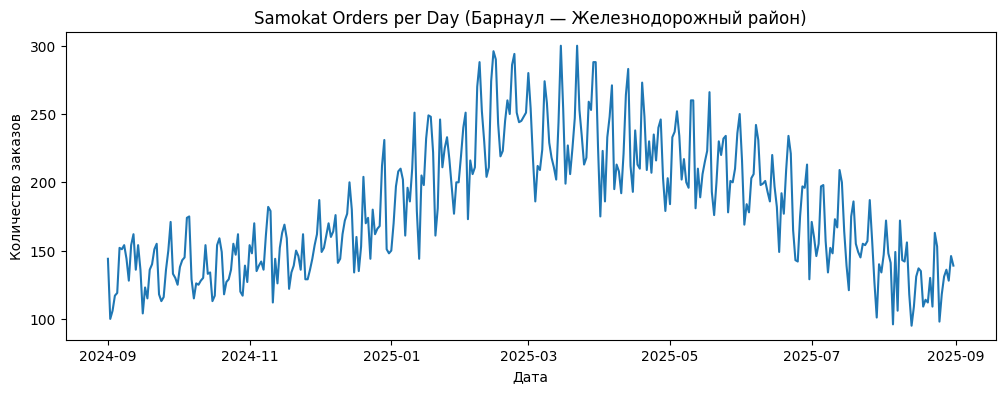

In [ ]:
orders_per_day = df.groupby(df["order_time"].dt.date).size()
plt.figure(figsize=(12,4))
orders_per_day.plot()
plt.title("Samokat Orders per Day (Барнаул — Железнодорожный район)")
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

3. **Пиковые часы**

/tmp/ipython-input-2608711290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="hour_of_day", data=df, palette="Blues")


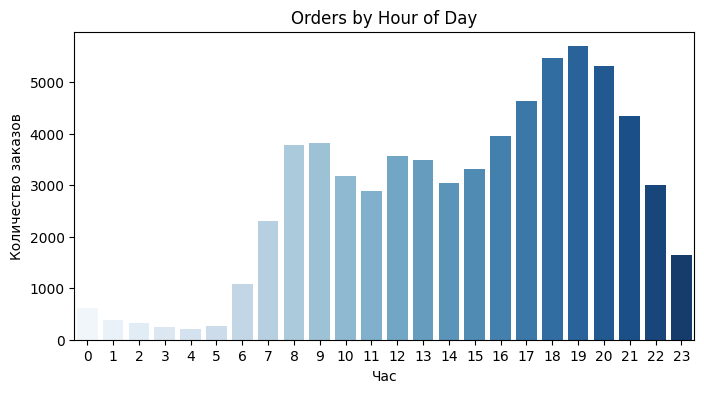

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="hour_of_day", data=df, palette="Blues")
plt.title("Orders by Hour of Day")
plt.xlabel("Час")
plt.ylabel("Количество заказов")
plt.show()

4. **Закакзы в неделе**

/tmp/ipython-input-3839884053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="day_of_week", data=df, palette="Greens")


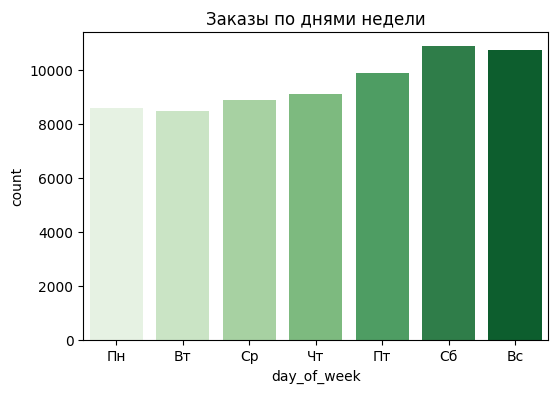

In [ ]:
days = ["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"]
plt.figure(figsize=(6,4))
sns.countplot(x="day_of_week", data=df, palette="Greens")
plt.xticks(range(7), days)
plt.title("Заказы по днями недели")
plt.show()

5. **Эффективность доставки**

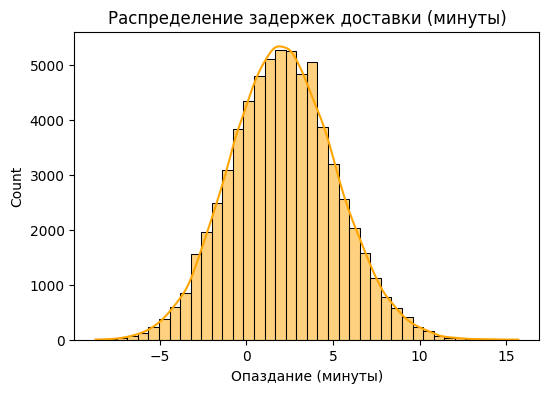

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["delay_minutes"], bins=40, kde=True, color="orange")
plt.title("Распределение задержек доставки (минуты)")
plt.xlabel("Опаздание (минуты)")
plt.show()

6. **Влияние погоды**

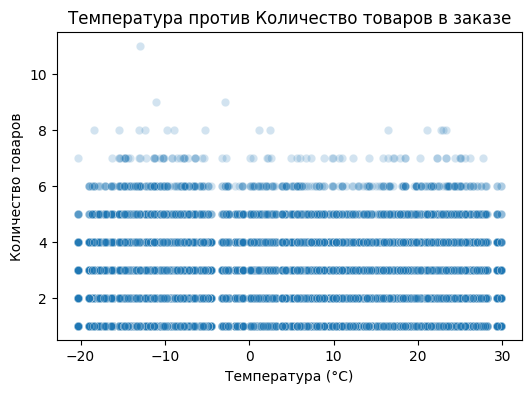

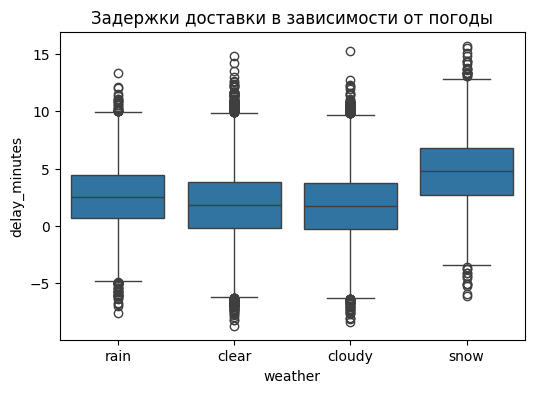

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="temperature_c", y="items_count", data=df, alpha=0.2)
plt.title("Температура против Количество товаров в заказе")
plt.xlabel("Температура (°C)")
plt.ylabel("Количество товаров")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(x="weather", y="delay_minutes", data=df)
plt.title("Задержки доставки в зависимости от погоды")
plt.show()

7. **Стоимость заказов**

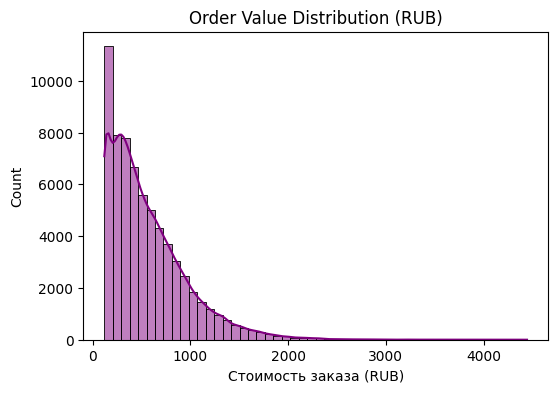

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["order_value_rub"], bins=50, kde=True, color="purple")
plt.title("Order Value Distribution (RUB)")
plt.xlabel("Стоимость заказа (RUB)")
plt.show()

8. **Типы курьеров**

/tmp/ipython-input-2569905184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="courier_type", data=df, palette="Set2")


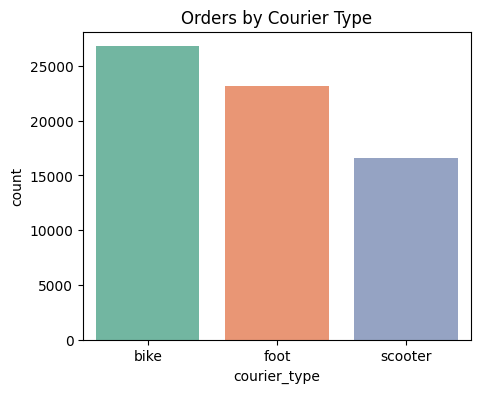

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="courier_type", data=df, palette="Set2")
plt.title("Orders by Courier Type")
plt.show()

9. Итоговый отчёт
- **Заказы по дням**: Наблюдаются колебания в зависимости от сезона и дня недели, особенно заметны пики на выходных.
- **Пиковые часы**: Наибольшее количество заказов приходится на **вечерние часы (18–21)**, а также есть небольшой пик утром (8–10).
- **Дни недели**: Больше всего заказов в пятницу и на выходных, меньше всего — в начале недели.
- **Эффективность доставки**: Большинство заказов доставляется вовремя или с небольшой задержкой, но плохая погода и часы пик увеличивают время доставки.
- **Влияние погоды**: Дождь и снег приводят к увеличению задержек. В холодные дни может расти количество заказанных товаров.
- **Стоимость заказов**: Основная часть заказов находится в диапазоне **500–2000 RUB**, но встречаются и дорогие заказы (продукты на неделю и больше).
- **Курьеры**: Больше всего доставок выполняется на велосипедах, затем пешком и на самокатах, что типично для городской среды Барнаула.
